#PHYS 326 Lab 3#

In this lab, we will practice fitting a line to data.  The task is not particularly hard, but will give those who are new to programming a chance to practice some basic methods.  You may adapt this template for your write-up. Don't forget your name!

##Part 1a:##

Let's start with something to which we already know the answer:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
x=np.array([1,2,3])
y=np.array([3,5,7])

From the textbook (equations 8.10 through 8.12), we know the coefficients are 

$$
A = \frac{\sum x^2 \sum y - \sum x \sum xy}{\Delta}
$$


$$
B = \frac{N\sum xy - \sum x \sum y}{\Delta}
$$

where $\Delta = N\sum x^2 - \left( \sum x \right)^2$

In [3]:
#A=np.sum(x*x)*np.sum(y)-np.sum(x)*np.sum(x*y)
#B=x.size*np.sum(x*y)-np.sum(x)*np.sum(y)
#delta=x.size*np.sum(x*x)-(np.sum(x))**2


In [4]:
def findA(x,y):
   return np.sum(x*x)*np.sum(y)-np.sum(x)*np.sum(x*y)

In [5]:
def findB(x,y):
    return x.size*np.sum(x*y)-np.sum(x)*np.sum(y)

In [6]:
def findDelta(x):
    return x.size*np.sum(x*x)-(np.sum(x))**2

In [7]:
delta=findDelta(x)
A=findA(x,y)/delta
B=findB(x,y)/delta

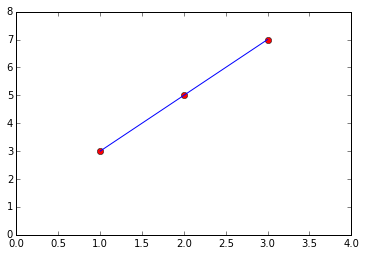

In [8]:
### SOMETHING MUST BE FIXED FOR THIS TO WORK CORRECTLY!
fig,ax=plt.subplots(1,1)
ax.set_xlim(0,4)
ax.set_ylim(0,8)
ax.plot(x,y,'ro')
ax.plot(x,B*x+A)

Hmm.  Something went wrong.  This doesn't look like a very good fit!  

Fix the cell above and run it again. (Hint: $B$ isn't $b$... check the textbook again.) 

What is the slope of the best-fit line?  Does it make sense? 

This was a fun trick question.  The book gives equation 8.1

$$
y = A + Bx
$$

It also includes the warning, "Unfortunately, many different notations are used for a linear relation; beware of confusing the form (8.1) with the equally poular $y=ax+b$.$ which is the problem we had encountered.

The uncertainties in the fit parameters A and B must be estimated given our best estimate for A,B, and the normal spread of y.  We need to calculate the deviations of y using eq 8.15 from our textbook

$$
\sigma_y=\sqrt{\frac{1}{N-2}\sum_{i=1}^N(y_i-A-Bxi)^2}
$$

Then using this value we can calulate the uncertainties in A and B using our book's equations 8.16 and 8.17 respectively.

$$\sigma_A=\sigma_y\sqrt{\frac{\sum x^2}{\Delta}}$$

$$\sigma_B=\sigma_y\sqrt{\frac{N}{\Delta}}$$

In [9]:
def ySigma(x,y,A,B):
    return np.sum((y-A-B*x)**2)/(float(len(x))-2.)

In [10]:
def ASigma(x,sigma,delta):
    return sigma*np.sqrt(np.sum(x*x)/delta)

In [11]:
def BSigma(x,sigma,delta):
    return sigma*np.sqrt(float(len(x))/delta)

In [12]:
yUncertainty=ySigma(x,y,A,B)
AUncertainty=ASigma(x,yUncertainty,delta)
BUncertainty=BSigma(x,yUncertainty,delta)
print "The uncertainty in the y values given is "+str(yUncertainty)
print "The uncertainty in the intercept A is "+str(AUncertainty)
print "The uncertainty in the slope B is "+str(BUncertainty)

The uncertainty in the y values given is 0.0
The uncertainty in the intercept A is 0.0
The uncertainty in the slope B is 0.0


This is hardly surprising given our perfect values created for the sake of the excercise.

##Part 1b:##

Repeat the exercise above for slightly less obvious values.  If you want to play around here, feel free!

In [13]:
x2=np.array([1,2,3])
y2=np.array([3.1,5,7.2])
delta2=findDelta(x2)
A2=findA(x,y)/delta2
B2=findB(x,y)/delta2
yUncertainty2=ySigma(x2,y2,A2,B2)
AUncertainty2=ASigma(x2,yUncertainty2,delta2)
BUncertainty2=BSigma(x2,yUncertainty2,delta2)

The uncertainty in the y values given is 0.05
The uncertainty in the intercept A is 0.0707106781187
The uncertainty in the slope B is 0.0353553390593


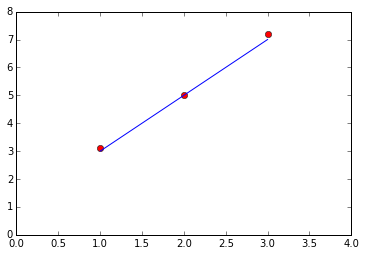

In [14]:
fig2,ax2=plt.subplots(1,1)
ax2.set_xlim(0,4)
ax2.set_ylim(0,8)
ax2.plot(x2,y2,'ro')
ax2.plot(x2,B2*x2+A2)
print "The uncertainty in the y values given is "+str(yUncertainty2)
print "The uncertainty in the intercept A is "+str(AUncertainty2)
print "The uncertainty in the slope B is "+str(BUncertainty2)


##Part 2:##

Now you are ready to find the best-fit value for the magnetic moment $\mu$ of the magnet in the pool ball from the last two weeks.  Clearly indicate your data, explain the method, plot the data with the best-fit line, and report your value of $\mu$ with uncertainty.  You will probably employ lots of cut-and-paste, but make sure that your write-up here is complete.

##Part 3:##

There are, of course, functions that will do this analysis for you.  For example, check out (i.e. Google it then try it)

    np.polyfit(x,y,1)

on one of the parts above.  Compare and comment.